<a href="https://colab.research.google.com/github/saqiba123/Prediction-Model-using-BigMart/blob/main/updated_SayabiDevs_Challenge_2_Prediction_Model_using_BigMart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SayabiDevs Challenge 2: Prediction Model using BigMart

###Saqiba Juna
###Shayan Hasan
###Rayyan Minhaj

In [ ]:
#importing the models and dependencies which we think will come in use
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor



In [ ]:
#now we will convert/open the data in csv into a pandas dataframe
big_mart_train=pd.read_csv('Train.csv')
big_mart_test=pd.read_csv('Test.csv')

#Combine test and train into one file
big_mart_train['source']='train'
big_mart_test['source']='test'
big_mart_data = pd.concat([big_mart_train, big_mart_test],ignore_index=True)
big_mart_data.shape #this tells us num of rows and columns
#here the rows are num of data and col are num of distinct features

big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

## Shape of the dataset

In [ ]:
print(big_mart_train.shape, big_mart_test.shape, big_mart_data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [ ]:
#now we will try and analyse the data

big_mart_data.describe() #it gives us some details about the int, float cols in data



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#we have some numerical values which can be seen as int and float
#however there are some object Dtypes which we will call categorical features
#these categorical features include: item identifier, fat content, item type, 
#outlet indentifier, outlet type


#as we can see there are some missing values in each column/feature, we have to
#put a check to handle them.
big_mart_data.isnull().sum()
#this shows us we have 1463 missing values in weight col and 2410 missing in 
#outlet size col

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
#alot of data seems to be missing, thus we will move towards preprocessing it

#we need to put the mean of weight category inside the missing values and the mode
#inside missing value of outlet size (this is beacause it a non numerical data or
#categorical data)

mean_val= big_mart_data['Item_Weight'].mean()

big_mart_data['Item_Weight'].fillna(mean_val,inplace=True)



In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
big_mart_data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [ ]:
new=big_mart_data['Outlet_Size'].mode()
print(new)

0    Medium
dtype: object


In [ ]:
big_mart_data['Outlet_Size'].fillna(big_mart_data['Outlet_Size'].mode().iloc[0],inplace=True)

In [ ]:
big_mart_data['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
#Lets check again the empty or missing NaN values 
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
big_mart_data.Item_Outlet_Sales = big_mart_data.Item_Outlet_Sales.fillna(big_mart_data.Item_Outlet_Sales.mean())

In [ ]:
#now all the empty or missing NaN values have been replaced
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

## Visualization of data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


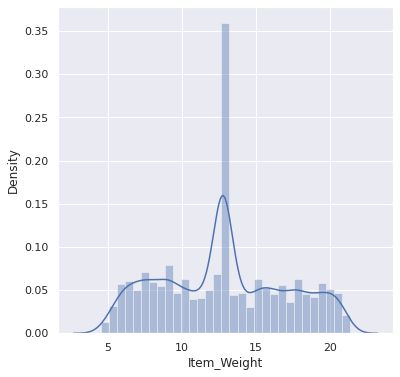

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


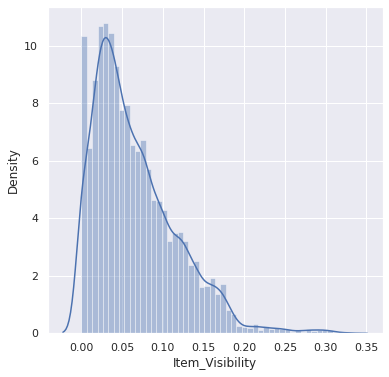

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


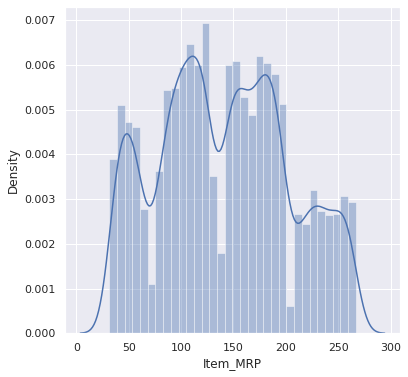

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


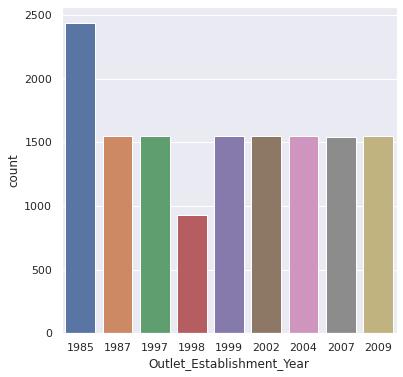

In [ ]:
sns.set() #set() gives us some themes we can use while plotting our data


#distribution curves
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight']) #we can replace this with any other feature to view its dist curve as well.
plt.show()

plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility']) #we can replace this with any other feature to view its dist curve as well.
plt.show()

plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP']) #we can replace this with any other feature to view its dist curve as well.
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(big_mart_data['Outlet_Establishment_Year']) #we can replace this with any other feature to view its dist curve as well.
plt.show()

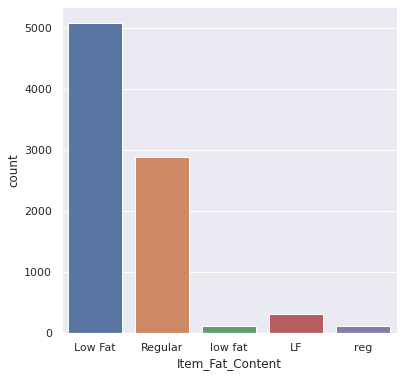

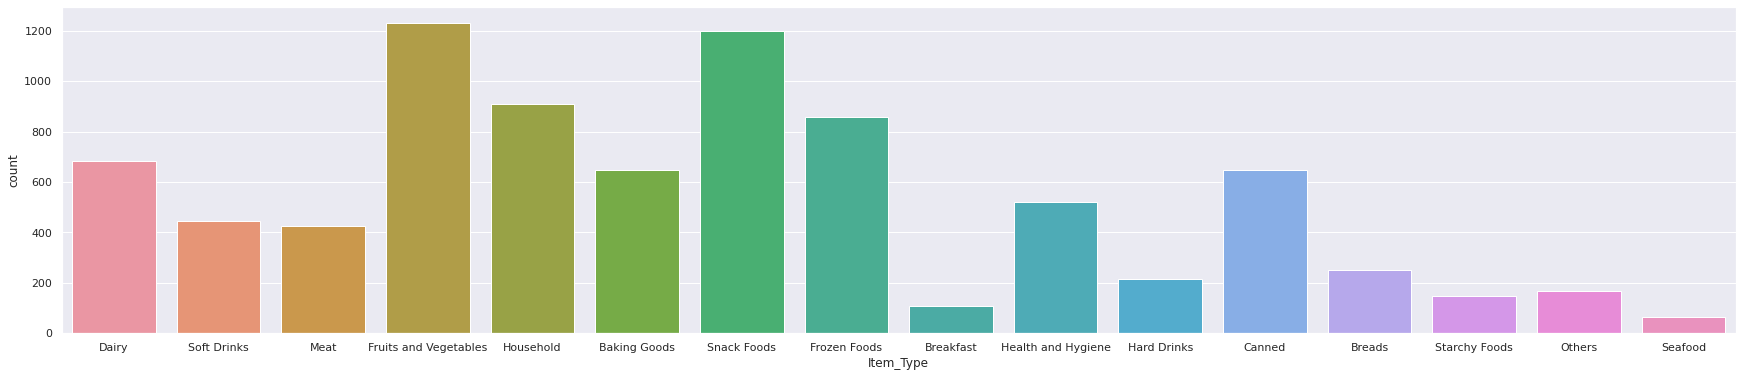

In [ ]:
#we have shown the numerical data in form of plots now
#lets visualise categorical (non numerical) data

plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data) #similarly u can change the x value here to display other data
plt.show()

print('\n')

plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data) #similarly u can change the x value here to display other data
plt.show()


## Data preprocessing: Convert the Categrical data into numerical format! 

In [ ]:
#now we move towards data preprocessing
#we need to convert all our categorical data to numerical using Label Encoding

big_mart_data['Item_Fat_Content'].value_counts()
#reducing the redundant repeating categorical values thru replacement
big_mart_data.replace({'Item_Fat_Content':{'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)



In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [ ]:
#we transform all the 7 categorical values to numerical
#using Label Encoding

encoder= LabelEncoder()

#gives one value (0,1 etc) to each unique entity
big_mart_data['Item_Identifier']= encoder.fit_transform(big_mart_data['Item_Identifier'])

#repeat for all other categorical columns
big_mart_data['Item_Fat_Content']= encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type']= encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier']= encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size']= encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type']= encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type']= encoder.fit_transform(big_mart_data['Outlet_Type'])



In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,train
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,train


In [ ]:
big_mart_data.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
source                        object
dtype: object

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
big_mart_data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train_df = big_mart_data.loc[big_mart_data['source']=="train"]
test_df = big_mart_data.loc[big_mart_data['source']=="test"]

#Drop unnecessary columns:
test_df.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train_df.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train_df.to_csv("train_updated.csv",index=False)
test_df.to_csv("test_updated.csv",index=False)

## Create the Model!

In [ ]:
# import the updated data
training_data = pd.read_csv("train_updated.csv")
testing_data = pd.read_csv("test_updated.csv")

In [ ]:
training_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,249.8092,9,1,0,1,3735.1380
1,8,5.92,1,0.019278,48.2692,3,1,2,2,443.4228
2,662,17.50,0,0.016760,141.6180,9,1,0,1,2097.2700
3,1121,19.20,1,0.000000,182.0950,0,1,2,0,732.3800
4,1297,8.93,0,0.000000,53.8614,1,0,2,1,994.7052


## Split the dataset

In [ ]:
#lets split features and targets
#first we remove outlet sales
X=training_data.drop(columns='Item_Outlet_Sales',axis=1)
Y=training_data['Item_Outlet_Sales']
#print(X)

In [ ]:
print(X.shape,Y.shape)

(8523, 9) (8523,)


In [ ]:
#now we can easily split data into training and testing
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape )

(8523, 9) (6818, 9) (1705, 9)


In [ ]:
#train the model using XGBoost Regressor model

#we use the xgboost algo here rather than normal regression because it is more
#accurate in implementaion of gradient boosting which is what we are trying to see
#with our BigMart data, how the performance GRADUALLY changes over time
regress= XGBRegressor()

In [ ]:
regress.fit(X_train, Y_train)

[17:19:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#gettin r^2 value (coeff of determination) which determines how close our trained
#model was in comparison to actual value, the closer the value for our trained value to our
#tested value, the more accurate the model performed

training_data_prediction=regress.predict(X_train)
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R^2 VALUE',r2_train )

R^2 VALUE 0.6345373042021171


## Accuracy of model

In [ ]:
model_accuracy = round(regress.score(X_train,Y_train) * 100,2)
model_accuracy

63.45

In [ ]:
training_data_prediction=regress.predict(X_test)
r2_test=metrics.r2_score(Y_test,training_data_prediction)
print('R^2 VALUE',r2_test )

R^2 VALUE 0.5851712956179091
